In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_train=pd.read_csv("/content/Google_Stock_Price_Train.csv")

In [ ]:
df_test=pd.read_csv("/content/Google_Stock_Price_Test.csv")

In [ ]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
#df_train = df_train.set_index('Date')
len(df_train)
df_train.describe()
df_train.set_index('Date')
df_test.set_index('Date')

,Open,High,Low,Close,Volume
Date,,,,,
1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"


In [ ]:

train=df_train.iloc[:,1:2]
test=df_test.iloc[:,1:2]
train
test

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40
5,807.86
6,805.00
7,807.14
8,807.48
9,807.08


In [ ]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
df_train.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
train=scaler.fit_transform(train)
train

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


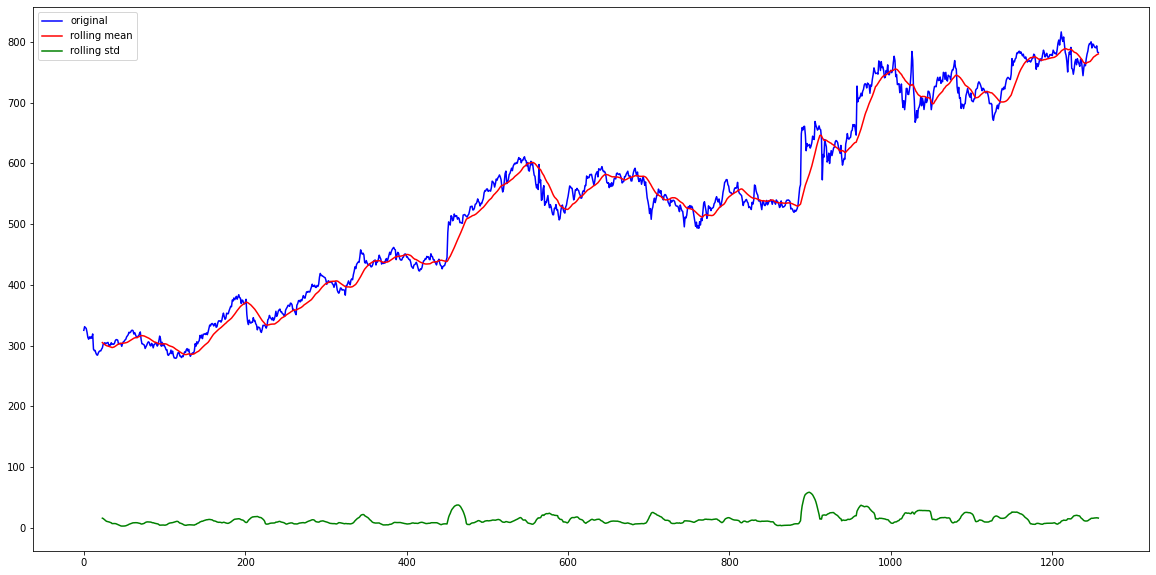

results of dickey-fuller test
Test-statistic                   -0.776211
#no.of lags used                  0.826010
p-value                           0.000000
number of observations used    1257.000000
Critical value(1%)               -3.435563
Critical value(5%)               -2.863842
Critical value(10%)              -2.567996
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
  rolmean=timeseries.rolling(window=24).mean()
  rolstd=timeseries.rolling(window=24).std()
  orig=plt.plot(timeseries,color="blue",label='original')
  mean=plt.plot(rolmean,color='red',label='rolling mean')
  std=plt.plot(rolstd,color='green',label='rolling std')
  plt.legend(loc='best')
  plt.show()
  print("results of dickey-fuller test")
  dftest=adfuller(timeseries,autolag='AIC')
  dfoutput=pd.Series(dftest[0:4],index=['Test-statistic','#no.of lags used','p-value','number of observations used'])
  for key,value in dftest[4].items():
    dfoutput['Critical value(%s)'%key]=value
  print(dfoutput)

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
test_stationary(df_train['Open'])






In [ ]:
x_train=[]
y_train=[]
x_test=[]
for i in range(120,len(train)):
  x_train.append(train[i-120:i,0])
  y_train.append(train[i,0])

x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)

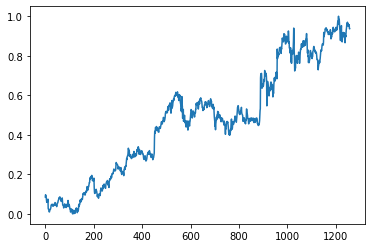

In [ ]:
plt.plot(train)

In [ ]:
len(test)

20

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
 # Dimension of array is 3.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout


In [ ]:
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
36/36 [==============================] - 4s 104ms/step - loss: 0.5040
Epoch 2/100
36/36 [==============================] - 4s 104ms/step - loss: 0.3016
Epoch 3/100
36/36 [==============================] - 4s 104ms/step - loss: 0.2364
Epoch 4/100
36/36 [==============================] - 4s 103ms/step - loss: 0.1813
Epoch 5/100
36/36 [==============================] - 4s 104ms/step - loss: 0.1366
Epoch 6/100
36/36 [==============================] - 4s 103ms/step - loss: 0.1194
Epoch 7/100
36/36 [==============================] - 4s 103ms/step - loss: 0.1010
Epoch 8/100
36/36 [==============================] - 4s 102ms/step - loss: 0.0817
Epoch 9/100
36/36 [==============================] - 4s 104ms/step - loss: 0.0742
Epoch 10/100
36/36 [==============================] - 4s 104ms/step - loss: 0.0647
Epoch 11/100
36/36 [==============================] - 4s 101ms/step - loss: 0.0589
Epoch 12/100
36/36 [==============================] - 4s 104ms/step - loss: 0.0519
Epoch 13/100


In [ ]:
dataset = pd.concat((df_train['Open'],df_test['Open']), axis = 0)
inputs = dataset[len(dataset) - len(df_test) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test = []
for i in range(120,140):
    x_test.append(inputs[i-120:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predict_rnn = regressor.predict(x_test)
predict_rnn = scaler.inverse_transform(predict_rnn)

In [ ]:
predict_rnn

array([[790.57825],
       [790.4365 ],
       [790.2986 ],
       [790.1693 ],
       [790.10944],
       [790.18524],
       [790.3536 ],
       [790.5752 ],
       [790.77606],
       [790.9621 ],
       [791.08136],
       [791.17145],
       [791.2142 ],
       [791.2665 ],
       [791.3075 ],
       [791.42175],
       [791.58655],
       [791.80273],
       [792.0022 ],
       [792.0887 ]], dtype=float32)

In [ ]:
from keras.layers import LSTM, Dense, Activation, Dropout, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.optimizers import Adam

In [ ]:
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, Image
import plotly.graph_objects as go

In [ ]:
fig=go.Figure(data=[go.Candlestick(x=df_train.index,open=df_train['Open'],close=df_train['Close'],low=df_train['Low'],high=df_train['High'])])
fig.show()

In [ ]:
test1 = df_test.iloc[:,1:2].values

In [ ]:
model = Sequential()
model.add(LSTM(10, input_shape=(None,1))) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=50, batch_size=1)
predicted_data2=model.predict(x_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

Epoch 1/50
1138/1138 [==============================] - 23s 20ms/step - loss: 0.0043
Epoch 2/50
1138/1138 [==============================] - 20s 18ms/step - loss: 9.7053e-04
Epoch 3/50
1138/1138 [==============================] - 20s 18ms/step - loss: 7.7503e-04
Epoch 4/50
1138/1138 [==============================] - 20s 18ms/step - loss: 7.1284e-04
Epoch 5/50
1138/1138 [==============================] - 20s 18ms/step - loss: 5.6573e-04
Epoch 6/50
1138/1138 [==============================] - 20s 17ms/step - loss: 5.2647e-04
Epoch 7/50
1138/1138 [==============================] - 20s 18ms/step - loss: 4.6509e-04
Epoch 8/50
1138/1138 [==============================] - 20s 18ms/step - loss: 4.7223e-04
Epoch 9/50
1138/1138 [==============================] - 20s 18ms/step - loss: 4.1890e-04
Epoch 10/50
1138/1138 [==============================] - 20s 17ms/step - loss: 4.0255e-04
Epoch 11/50
1138/1138 [==============================] - 20s 18ms/step - loss: 3.8978e-04
Epoch 12/50
1138/1138 [

In [ ]:
predicted_data2

array([[782.79706],
       [779.46747],
       [788.29944],
       [786.31146],
       [794.3587 ],
       [804.6421 ],
       [805.70404],
       [802.7242 ],
       [804.74194],
       [805.36957],
       [805.125  ],
       [804.07   ],
       [803.5505 ],
       [805.312  ],
       [805.71173],
       [819.4338 ],
       [826.0979 ],
       [833.0358 ],
       [830.0292 ],
       [811.8317 ]], dtype=float32)

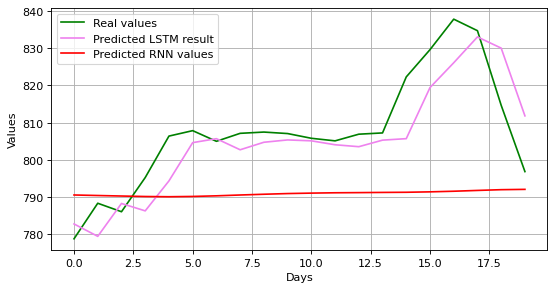

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test1,color="Green",label="Real values")
plt.plot(predicted_data2,color="violet",label="Predicted LSTM result")
plt.plot(predict_rnn,color='red',label="Predicted RNN values")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [ ]:
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return np.sqrt(mean_error)

print(rmse_metric(test1,predict_rnn))
print(rmse_metric(test1,predicted_data2))

[21.95309122]
[8.25113741]
